In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [39]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [40]:
y.index = y.name
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [41]:
y.index = pd.to_datetime(y.index)

In [42]:
y = y.sort_index().fillna(0.)

# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [10]:
#!pip install pytrends

In [43]:
from pytrends.request import TrendReq

In [44]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession","Huawei","Interest Rates","App Store","Phone Release","Apple Car","Python","Water Bottle","MQE"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [48]:
df = df.resample("Q").mean()

In [49]:
temp = pd.concat([y, df],axis = 1).dropna()

In [50]:


y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [51]:
temp

,BasicEPS,iPhone,Recession,Huawei,Interest Rates,App Store,Phone Release,Apple Car,Python,Water Bottle,MQE
2004-03-31,0.002,0.000000,7.333333,0.000000,60.333333,0.000000,8.666667,11.333333,26.666667,10.333333,0.000000
2004-06-30,0.003,0.000000,7.666667,1.000000,67.000000,0.000000,13.333333,12.000000,27.333333,11.333333,40.666667
2004-09-30,0.0,0.000000,6.000000,1.000000,53.000000,0.000000,18.666667,12.666667,24.666667,10.333333,51.333333
2004-12-31,0.013,0.000000,7.333333,1.000000,46.666667,0.000000,13.000000,13.000000,24.666667,11.666667,22.000000
2005-03-31,0.013,0.000000,6.000000,1.000000,49.000000,0.000000,13.666667,14.000000,25.000000,10.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,1.29,55.666667,56.333333,33.333333,75.333333,54.000000,57.000000,75.000000,84.000000,77.000000,39.333333
2022-12-31,1.89,51.333333,48.333333,31.000000,80.000000,53.333333,43.666667,69.000000,84.666667,72.000000,39.000000
2023-03-31,1.53,49.333333,36.666667,28.666667,86.000000,53.333333,39.000000,75.666667,89.000000,76.000000,37.333333
2023-06-30,1.27,47.666667,29.000000,26.000000,75.333333,51.000000,39.333333,74.666667,75.666667,76.333333,37.333333


# 2.) Normalize all the X data

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_scaled = scaler.fit_transform(df)

# 3.) 

In [55]:
X_scaled

array([[-1.85647791e+00, -7.69326353e-01, -1.04653810e+00,
         9.89384478e-01, -1.48297011e+00, -1.86890776e+00,
        -1.10965020e+00, -5.47047025e-01, -1.07242186e+00,
        -2.50480762e+00],
       [-1.85647791e+00, -7.49244034e-01, -1.00672771e+00,
         1.50742031e+00, -1.48297011e+00, -1.54325604e+00,
        -1.07756107e+00, -5.14891140e-01, -1.02766087e+00,
         1.52195485e+00],
       [-1.85647791e+00, -8.49655627e-01, -1.00672771e+00,
         4.19545066e-01, -1.48297011e+00, -1.17108264e+00,
        -1.04547193e+00, -6.43514679e-01, -1.07242186e+00,
         2.57815484e+00],
       [-1.85647791e+00, -7.69326353e-01, -1.00672771e+00,
        -7.25889710e-02, -1.48297011e+00, -1.56651688e+00,
        -1.02942737e+00, -6.43514679e-01, -1.01274053e+00,
        -3.26395137e-01],
       [-1.85647791e+00, -8.49655627e-01, -1.00672771e+00,
         1.08723569e-01, -1.48297011e+00, -1.51999520e+00,
        -9.81293663e-01, -6.27436736e-01, -1.07242186e+00,
        -2.

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [56]:
from sklearn.linear_model import Lasso

In [81]:
lasso = Lasso(alpha = 0.1)

In [82]:
lasso.fit(X_scaled[:-2],y)

Lasso(alpha=0.1)

In [83]:
coefficients = lasso.coef_

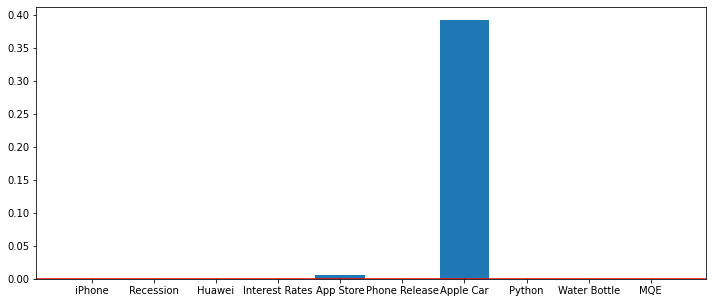

In [84]:
plt.figure(figsize = (12,5))
plt.bar(X.columns, coefficients)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

### It make sense as more searches for Apple car and app store is possitively associated with Apple's earning 

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?